# Exercícios - Entrando no ciclo

Chegou o momento de resolvermos alguns problemas utilizando as técnicas de ciência de dados que acumulamos até aqui!

A ideia é que vcs exercitem (idealmente em grupo) a **esteira de um projeto de data science**.

Exercitem a esteira completa (incluindo as etapas de exploração dos dados!), mas deem foco especial para a etapa de modelagem, objetivando a melhoria das **métricas de avaliação** que você(s) julgarem as mais adequadas!

<img src="https://www.abgconsultoria.com.br/blog/wp-content/uploads/img33-768x242.png" width=700>

___

Para cada um dos datasets a seguir (alguns já conhecemos), responda:

- 1 - qual é o problema a ser resolvido?
- 2 - qual é a variável resposta (target?)
- 3 - o problema em questão é um problema de classificação ou regressão?
- 4 - faça EDA dos dados!! Conheça os dados!
- 5 - crie um modelo que proporcione a melhor métrica avaliação (discuta qual métrica faz mais sentido)

Obs:

> utilize os estimadores/hipóteses que conhecemos até um momento;

> se algum integrante do grupo conhecer outros estimadores/hipóteses, o grupo pode usar estas ferramentas **contanto que o integrante que conhece compartilhe com os demais colegas a essência do estimador a ser usado**
_____

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

____
____
____

### Problema 1: Titanic

Base `titanic.csv` na pasta `/datasets`

In [2]:
titanic = pd.read_csv("../datasets/titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [ ]:
# What is the main problem? Identify the survivors and what is the most important features

In [3]:
# What is the target? 
titanic.survived.unique()

array([1, 0], dtype=int64)

In [ ]:
# It is a regression or classification problem? It's a classification problem

#### EDA (only on train set)

In [4]:
# Substituir algumas strings em binary:
titanic["sex"] = titanic["sex"].replace("female", 0).replace("male", 1)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:
# Selecionar apenas as variáveis numéricas
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   int64 
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(5), object(9)
memory usage: 143.3+ KB


In [6]:
# "?" Substitui np.nan na lista
titanic = titanic.replace("?", np.nan)

In [7]:
# age, fare precisam ser numericos
titanic["age"] = pd.to_numeric(titanic["age"])
titanic["fare"] = pd.to_numeric(titanic["fare"])

In [8]:
df_model = titanic.select_dtypes(include = np.number)

In [9]:
df_model.shape

(1309, 7)

In [10]:
df_model.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

Neste caso, irei remover 263 records da amostra, pois a idade é uma feature importante para ser avaliada. Mesmo que se retire 20% do conteúdo, e 1 de fare

In [12]:
df_model.dropna(inplace = True)

<ipython-input-12-1caf4effb02f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.dropna(inplace = True)


In [13]:
df_model.shape

(1045, 7)

In [14]:
df_model.info()
# NaN retirado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   int64  
 1   survived  1045 non-null   int64  
 2   sex       1045 non-null   int64  
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   int64  
 5   parch     1045 non-null   int64  
 6   fare      1045 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 65.3 KB


In [15]:
X = df_model.drop(columns = ["survived"])
y = df_model["survived"]

#### Separando dados por treino e teste

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

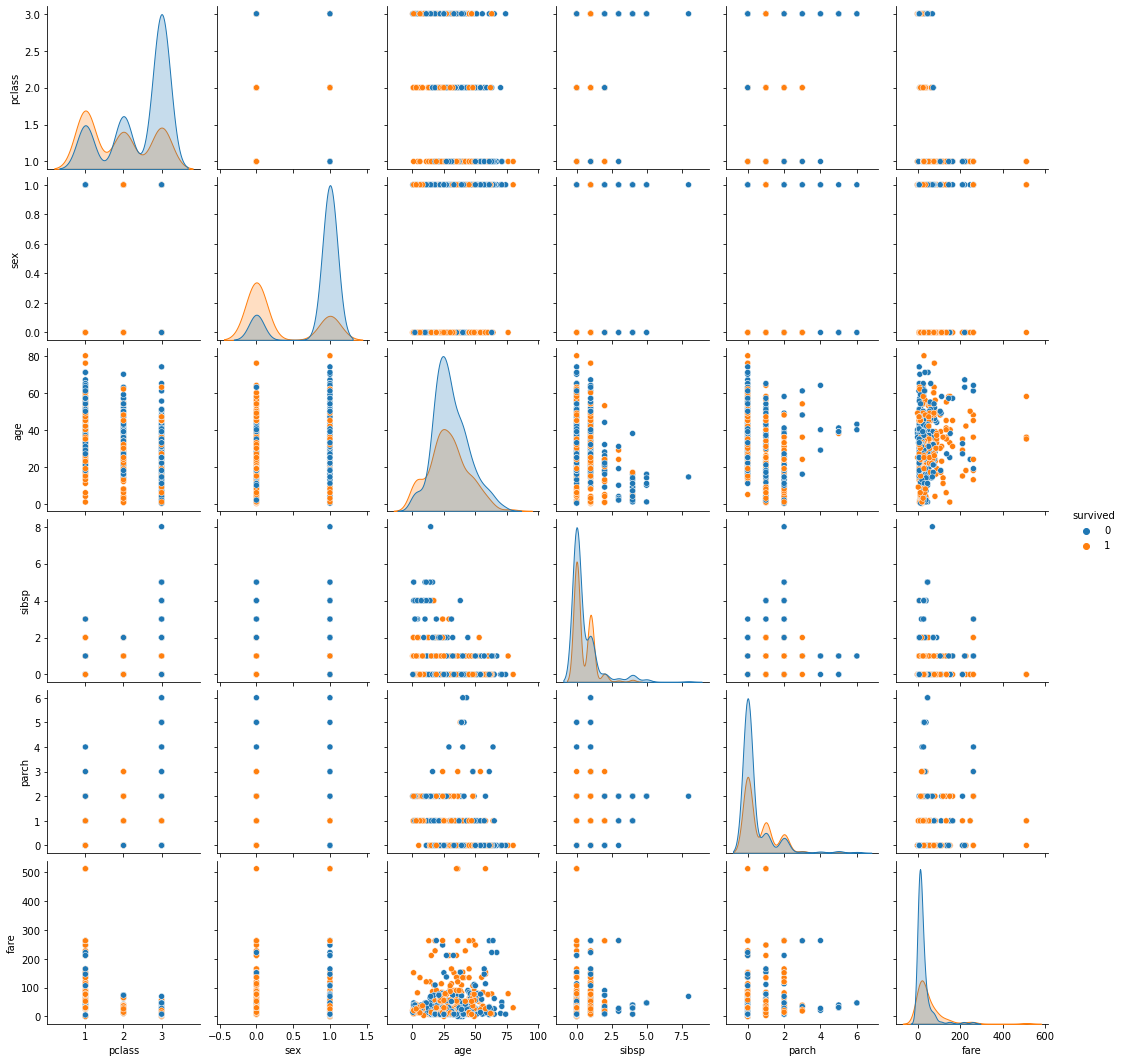

In [17]:
# EDA das features em relação ao target
sns.pairplot(data = pd.concat([X_train, y_train], axis = 1), hue = "survived");
# Um pouco difícil de achar um padrão entre sobreviventes baseado na EDA das features

### Create the model and train it!

In [17]:
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import MinMaxScaler # Important features. Dá pra usar isso em LogisticRegression?

clf = LogisticRegression().fit(X_train, y_train)
#clf_scaled = MinMaxScaler

In [18]:
vars(clf)

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype=object),
 'n_features_in_': 6,
 'classes_': array([0, 1], dtype=int64),
 'n_iter_': array([79]),
 'coef_': array([[-1.10104936e+00, -2.68882949e+00, -4.34502897e-02,
         -3.81793946e-01,  3.63379112e-02,  2.00207727e-03]]),
 'intercept_': array([4.96118541])}

In [19]:
#b0
clf.intercept_

array([4.96118541])

In [20]:
clf.coef_

array([[-1.10104936e+00, -2.68882949e+00, -4.34502897e-02,
        -3.81793946e-01,  3.63379112e-02,  2.00207727e-03]])

In [21]:
data = pd.DataFrame(data = clf.coef_[0], index = clf.feature_names_in_)
data

,0
pclass,-1.101049
sex,-2.688829
age,-0.043450
sibsp,-0.381794
parch,0.036338
fare,0.002002


In [22]:
inter = pd.DataFrame(data = clf.intercept_, index = ["intercept"])
inter

,0
intercept,4.961185


In [23]:
b_vector = pd.concat([inter, data])

In [24]:
b_vector

,0
intercept,4.961185
pclass,-1.101049
sex,-2.688829
age,-0.043450
sibsp,-0.381794
parch,0.036338
fare,0.002002


### Predito vs target

In [25]:
# target
y_test.values

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [26]:
# predito
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

#### Podemos alterar o valor do cutoff

In [27]:
# testar cutoff = 0.3
proba = clf.predict_proba(X_test)[:,1]
cutoff = 0.3
y_pred03 = np.where(proba >= cutoff, 1, 0)

In [28]:
# testar cutoff = 0.4
proba = clf.predict_proba(X_test)[:,1]
cutoff = 0.4
y_pred04 = np.where(proba >= cutoff, 1, 0)

In [29]:
y_pred04

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

### Matrix de confusão

In [30]:
# Utilizando uma matriz de confusão e analisar o modelo
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[142  33]
 [ 50  89]]


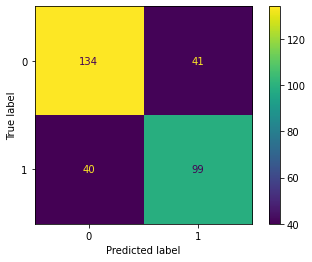

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred04)

In [44]:
from sklearn.metrics import classification_report
pd_clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
pd_clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.739583,0.729508,0.735669,0.734546,0.735123
recall,0.811429,0.640288,0.735669,0.725858,0.735669
f1-score,0.773842,0.681992,0.735669,0.727917,0.733182
support,175.000000,139.000000,0.735669,314.000000,314.000000


___
___
___

### Problema 2 - Tips

Base `tips.csv` na pasta `/datasets`

In [3]:
tips = pd.read_csv("../datasets/tips.csv")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [ ]:
# What is the main problem?

In [ ]:
# What is the target?

In [ ]:
# It is a regression or classification problem?

In [ ]:
# EDA (only on train set)

In [ ]:
# Create the model and train it!

___
___
___

### Problema 3: house prices

Base `house_prices.csv` na pasta `/datasets`

In [6]:
price = pd.read_csv("../datasets/house_prices.csv")
price.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [ ]:
# What is the main problem?

In [ ]:
# What is the target?

In [ ]:
# It is a regression or classification problem?

In [ ]:
# EDA (only on train set)

In [ ]:
# Create the model and train it!

___
___
___

### Problema 4 - Iris

Base `iris.csv` na pasta `/datasets`

In [7]:
iris = pd.read_csv("../datasets/iris.csv")
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
# What is the main problem?

In [ ]:
# What is the target?

In [ ]:
# It is a regression or classification problem?

In [ ]:
# EDA (only on train set)

In [ ]:
# Create the model and train it!

___
___
___

### Problema 5 - breast cancer

Base `breast_cancer.csv` na pasta `/datasets`

In [8]:
df_cancer = pd.read_csv("../datasets/breast_cancer.csv")
df_cancer.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
# What is the main problem?

In [ ]:
# What is the target?

In [ ]:
# It is a regression or classification problem?

In [ ]:
# EDA (only on train set)

In [ ]:
# Create the model and train it!

___
___
___

### Problema 6 - VOCÊ ESCOLHE!

Entre no [Kaggle](https://www.kaggle.com/), ou consiga dados **supervisionados** (com o target desejado) em qualquer outra fonte, e faça o que fizemos acima!

___
___
___